In [8]:
FILE_URL <- "http://tarwi.lamolina.edu.pe/~clopez/Regresion/Grasa.txt"
FILE_ENCONDING <- "ISO-8859-1"
SEPARATOR <- "\t"

# Read file
Grasa.data <- read.csv(FILE_URL, fileEncoding = FILE_ENCONDING, sep = SEPARATOR)

# Mostrar datos
head(Grasa.data)

Grasa,Edad,Peso,Altura,Cuello,Pecho,Abdomen,Cadera,Muslo,Rodilla,Tobillo,Biceps,Antebrazo,Muñeca
12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [9]:
library(car)

In [11]:
# Creamos nuestro primer modelo
Grasa.m1 <- lm(Grasa ~ ., data = Grasa.data)

# Calculo de los factores de inflacion de varianza
vif(Grasa.m1)

# se recomienda no considerar las variables predictores que tienen un valor > 10

Edad      Peso    Altura    Cuello     Pecho   Abdomen    Cadera     Muslo 
 2.250450 33.509320  1.674591  4.324463  9.460877 11.767073 14.796520  7.777865 
  Rodilla   Tobillo    Biceps Antebrazo    Muñeca 
 4.612147  1.907961  3.619744  2.192492  3.377515

In [12]:
# Creamos nuestro segundo modelo
Grasa.m2 <- lm(Grasa ~ . - Peso, data = Grasa.data)

# Calculo de los factores de inflacion de varianza
vif(Grasa.m2)

Edad    Altura    Cuello     Pecho   Abdomen    Cadera     Muslo   Rodilla 
 2.153693  1.329805  3.955600  7.883188 11.285465 10.469282  7.753101  4.312352 
  Tobillo    Biceps Antebrazo    Muñeca 
 1.843789  3.506897  2.192230  3.308705

In [13]:
# Creamos nuestro tercer modelo
Grasa.m3 <- lm(Grasa ~ . - Peso - Abdomen, data = Grasa.data)

# Calculo de los factores de inflacion de varianza
vif(Grasa.m3)

Edad    Altura    Cuello     Pecho    Cadera     Muslo   Rodilla   Tobillo 
 1.761778  1.329243  3.922800  4.882583  8.508681  7.574672  4.310949  1.837676 
   Biceps Antebrazo    Muñeca 
 3.481013  2.186342  3.258218

In [14]:
####################################
#         Best Selection 
####################################
install.packages("leaps")
library(leaps)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
# Calculo del numero de columna de Grasa.data 
# El valor que sale se le quita 1, porque incluye la salida
dim(Grasa.data)
# En total hay 14-1 = 13 columnas

[1] 252  14

In [15]:
# nvmax --> indica el numero de variables predictoras que estoy usando
Grasa.bss <- regsubsets(Grasa ~ ., data = Grasa.data, nvmax = 13)

summary(Grasa.bss)

Subset selection object
Call: regsubsets.formula(Grasa ~ ., data = Grasa.data, nvmax = 13)
13 Variables  (and intercept)
          Forced in Forced out
Edad          FALSE      FALSE
Peso          FALSE      FALSE
Altura        FALSE      FALSE
Cuello        FALSE      FALSE
Pecho         FALSE      FALSE
Abdomen       FALSE      FALSE
Cadera        FALSE      FALSE
Muslo         FALSE      FALSE
Rodilla       FALSE      FALSE
Tobillo       FALSE      FALSE
Biceps        FALSE      FALSE
Antebrazo     FALSE      FALSE
Muñeca        FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          Edad Peso Altura Cuello Pecho Abdomen Cadera Muslo Rodilla Tobillo
1  ( 1 )  " "  " "  " "    " "    " "   "*"     " "    " "   " "     " "    
2  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " "    
3  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " "    
4  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " " 

In [ ]:
#           Edad Peso Altura Cuello Pecho Abdomen Cadera Muslo Rodilla Tobillo
# 1  ( 1 )  " "  " "  " "    " "    " "   "*"     " "    " "   " "     " "    

# En esta salida el mejor modelo 1 es el que incluye solo la variable predictora Abdomen

# En Resumen :
#
# Ejemplo: Grasa.bss
#   M1: Grasa ~ Abdomen
#   M2: Grasa ~ Peso + Abdomen
#   M3: Grasa ~ Peso + Abdomen + Muñeca
#
#
#   M13: Grasa ~ .

In [17]:
reg.summary <- summary(Grasa.bss)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [35]:
reg.summary$adjr2

[1] 0.6603188 0.7165395 0.7244466 0.7307199 0.7325892 0.7346244 0.7371457
 [8] 0.7382101 0.7383504 0.7380516 0.7374763 0.7364456 0.7353426

In [ ]:
# rsq   --> Coeficiente de determinacion
# rss   --> Suma de cuadrados del residual
# adjr2 --> R cuadrado ajustado
# cp    --> Cp de Mallows:
# bic   -->

In [18]:
# Coeficiente de determinacion
reg.summary$rsq

[1] 0.6616721 0.7187981 0.7277401 0.7350112 0.7379161 0.7409681 0.7444763
 [8] 0.7465540 0.7477322 0.7484878 0.7489813 0.7490458 0.7490500

In [ ]:
# Ejemplo: Grasa.bss
#                                2
#   M1: Grasa ~ Abdomen   --->  R    = 66.2%
#                                H1 
#                                       2
#   M2: Grasa ~ Peso + Abdomen  --->   R   = 71.9%
#                                       H2 
#
#   M3: Grasa ~ Peso + Abdomen + Muñeca
#
#
#   M13: Grasa ~ .  --->
#
#

In [19]:
# Suma de cuadrado
reg.summary$rss

[1] 5947.463 4943.245 4786.054 4658.236 4607.169 4553.520 4491.849 4455.324
 [9] 4434.613 4421.330 4412.655 4411.522 4411.448

In [ ]:
# Se observa que el coeficiente de determinacion y la suma de cuadrado no es útil 
# para elegir el mejor modelo

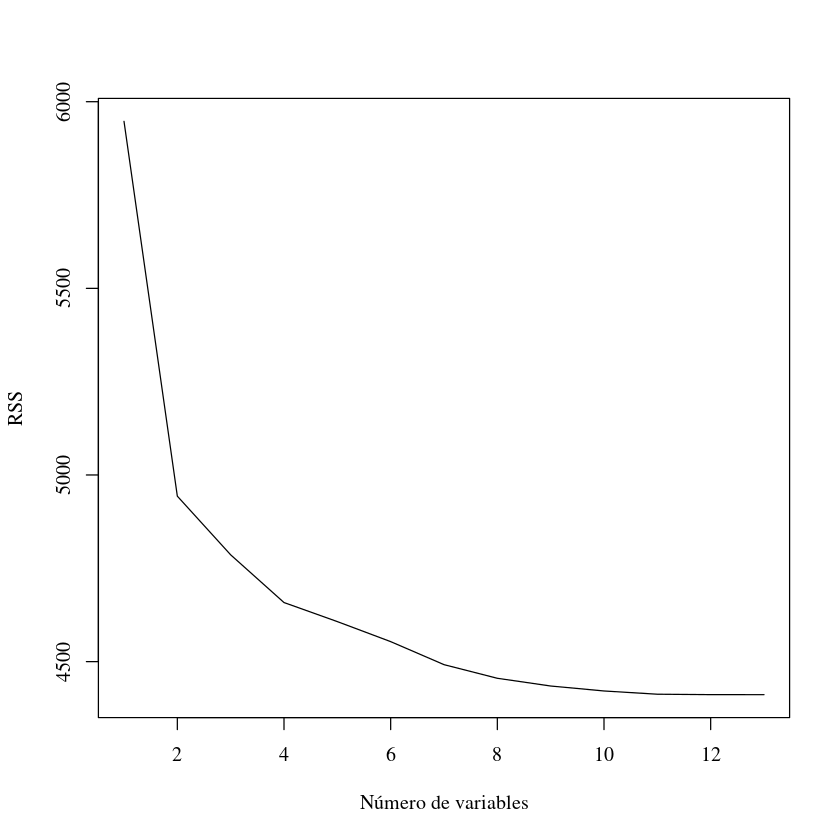

In [20]:
plot(reg.summary$rss, xlab = "Número de variables", ylab = "RSS", type = "l")

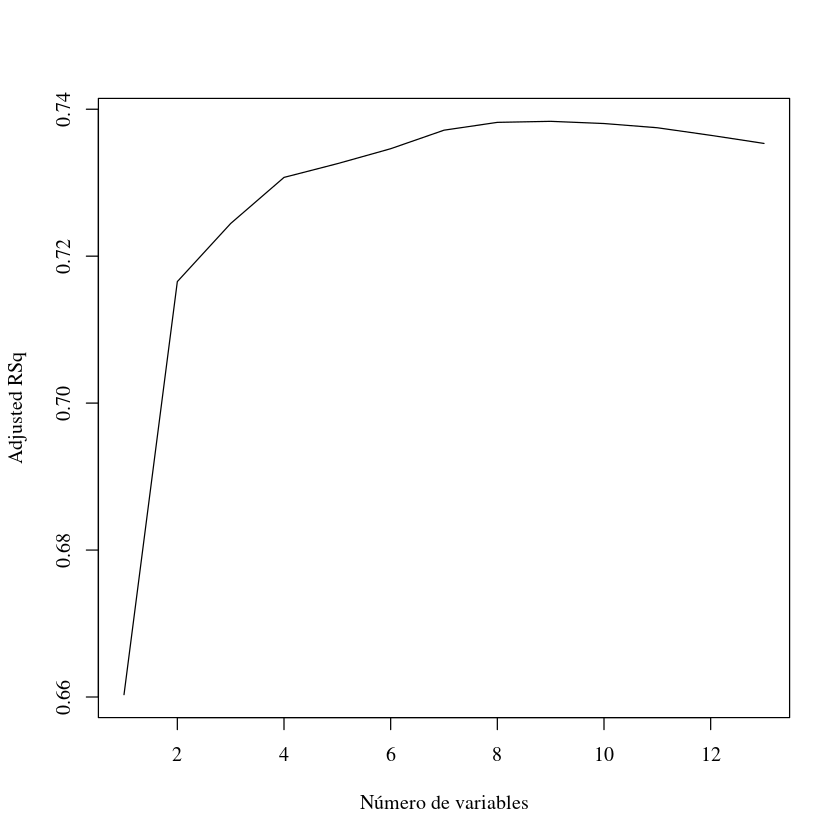

In [21]:
########################################
##  Aplicando el R cuadrado ajustado
########################################

# R cuadrado ajustado , el mejor modelo es el que tiene el mayor valor

plot(reg.summary$adjr2, xlab = "Número de variables", ylab = "Adjusted RSq", type = "l")

In [22]:
# Buscamos el mejor modelo segun el R cuadrado ajustado
which.max(reg.summary$adjr2)


[1] 9

In [23]:
# Para buscar el modelo en el gráfico, sabiendo que es el modelo 9
points(9, reg.summary$adjr2[9], col = "red", cex = 2, pch = 20)

# ES UN ERROR EN EL GRAFICO

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


[1] 7

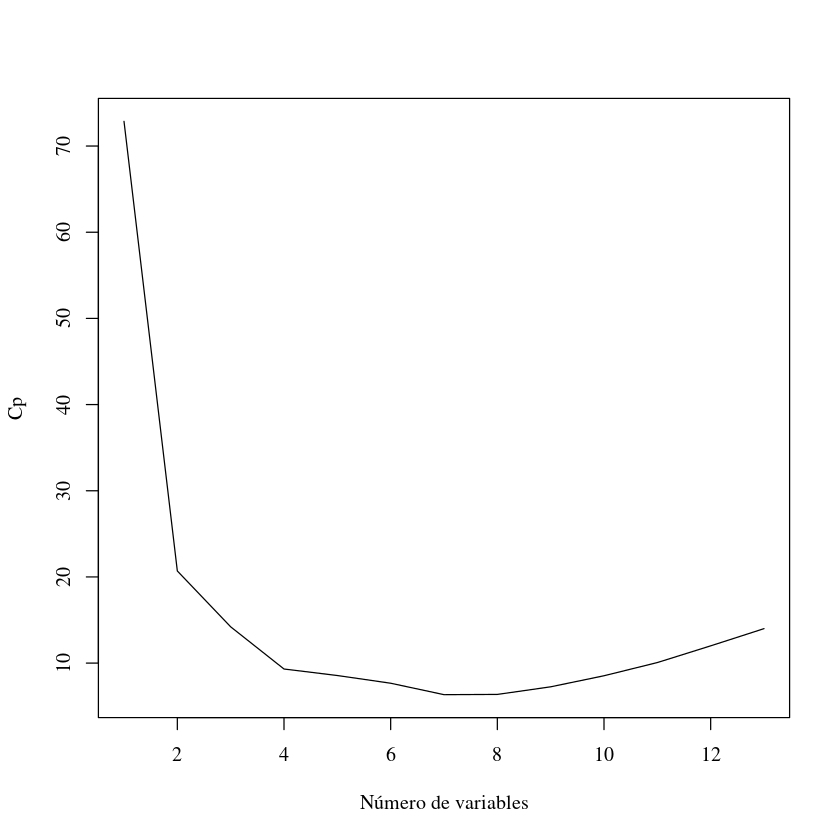

In [24]:
########################################
##  Aplicando el método de Mallow
########################################

plot(reg.summary$cp, xlab = "Número de variables", ylab = "Cp", type = 'l')
which.min(reg.summary$cp)

In [25]:
# Para buscar el modelo en el gráfico, sabiendo que es el modelo 7

points(7, reg.summary$cp[7], col = "red", cex = 2, pch = 20)

# ES UN ERROR EN EL GRAFICO

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


[1] 4

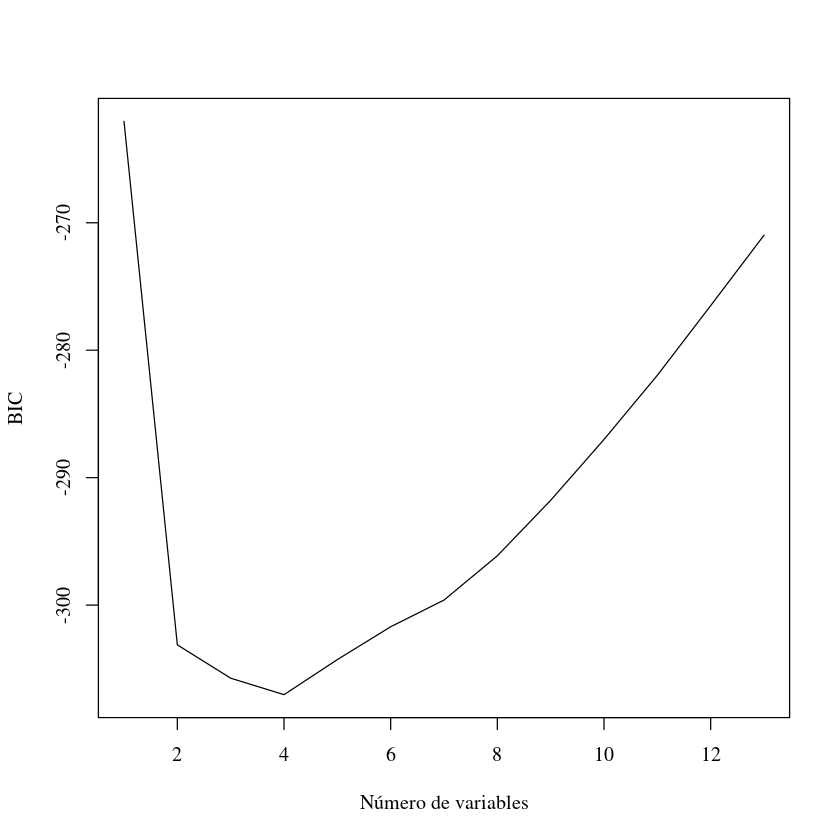

In [27]:
########################################
##  Aplicando el método de BIC
########################################
plot(reg.summary$bic, xlab = "Número de variables", ylab = "BIC", type = 'l')
which.min(reg.summary$bic)

In [28]:
points(4, reg.summary$bic[4], col = "red", cex = 2, pch = 20)

# ES UN ERROR EN EL GRAFICO

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [ ]:
# RESUMEN
#          2
#         R    : M9 --> Son 9 variables predictoras, por lo tanto tiene 10 factores 
#          aj  
#
#         C    : M7 --> Son 7 variables predictoras, por lo tanto tiene 7 factores 
#          p
#
#         BIC  : M4 --> Son 4 variables predictoras, por lo tanto tiene 5 factores 
#

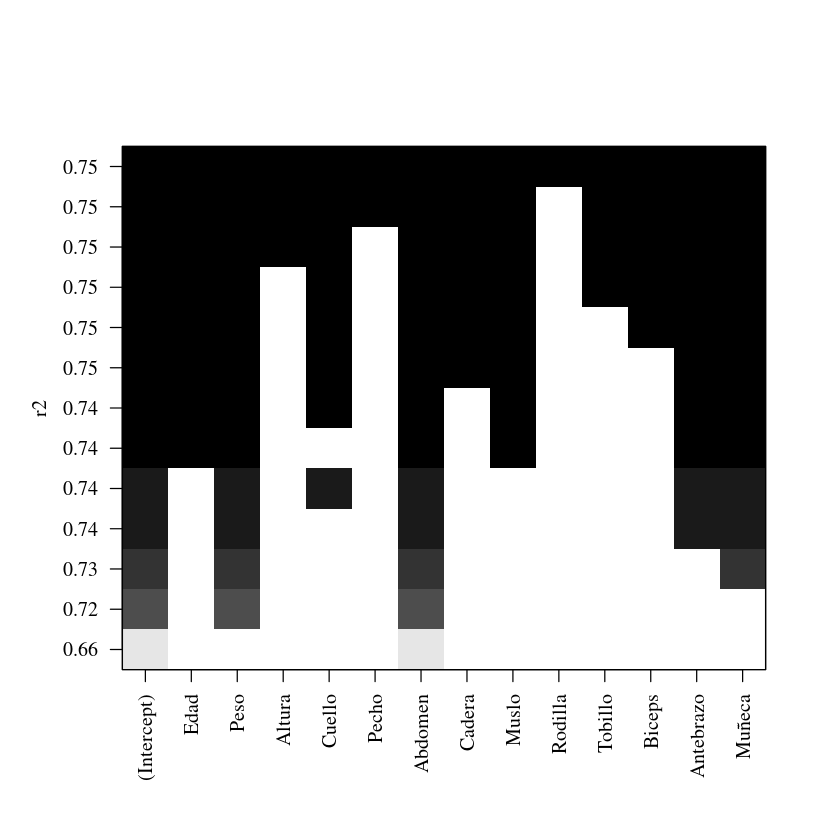

In [30]:
# Principio de la Parsimonia --> REVISAR ?

###################################################################################
# Seleccionar el modelo nal usando 
# el error de predicción por validación cruzada (ECV10).
##################################################################################
plot(Grasa.bss, scale = "r2") # el mejor modelo es el tiene el mayor valor

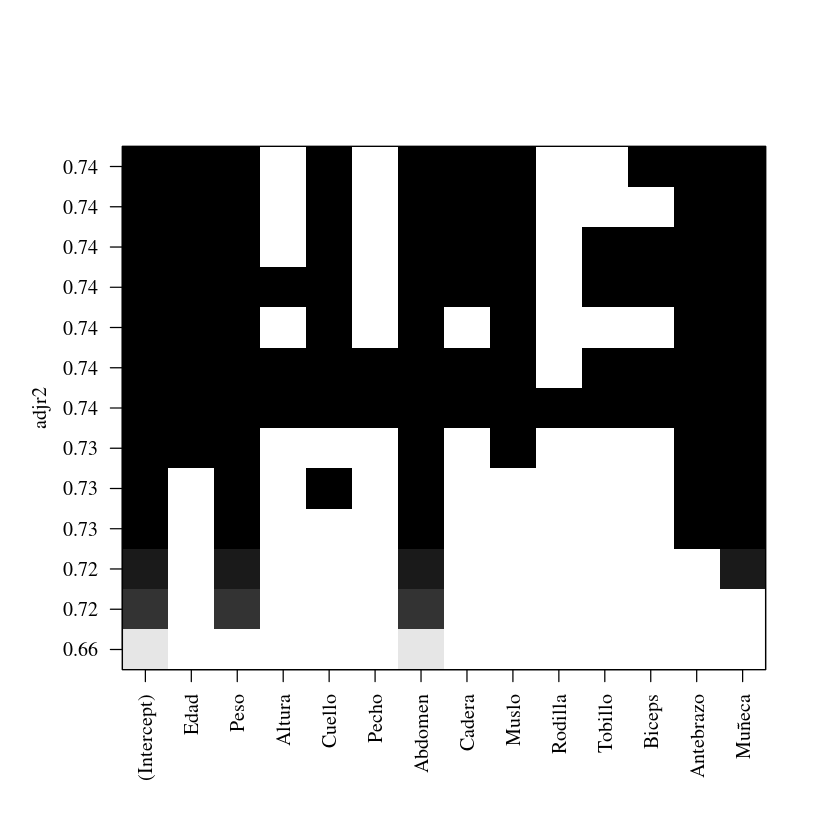

In [31]:
plot(Grasa.bss, scale = "adjr2")  # el mejor modelo es el tiene el menor valor

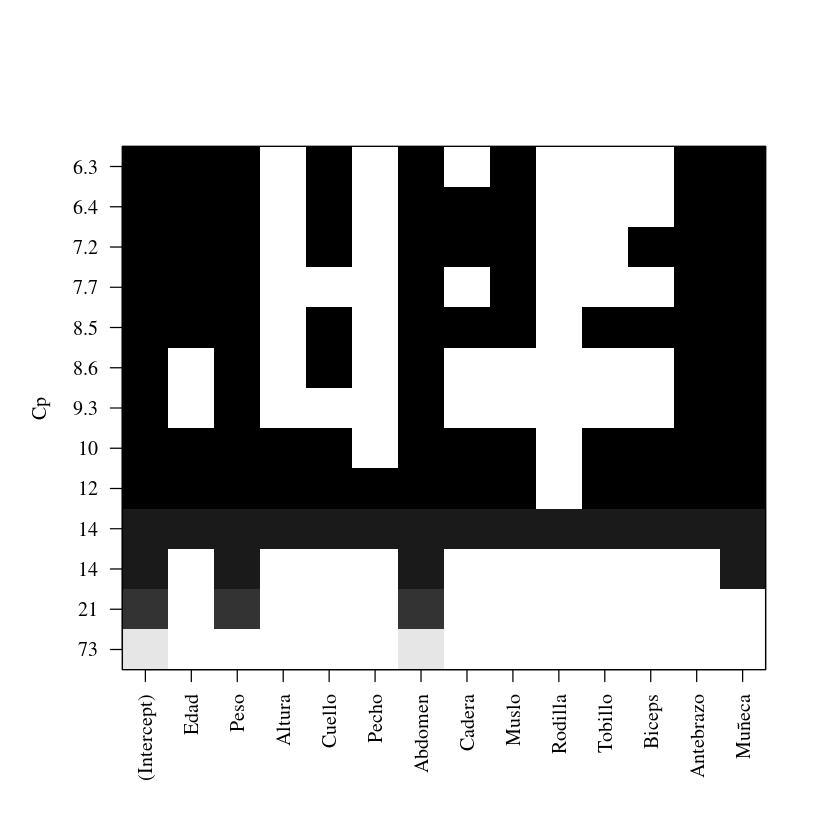

In [32]:
plot(Grasa.bss, scale = "Cp") # el mejor modelo es el tiene el menor valor

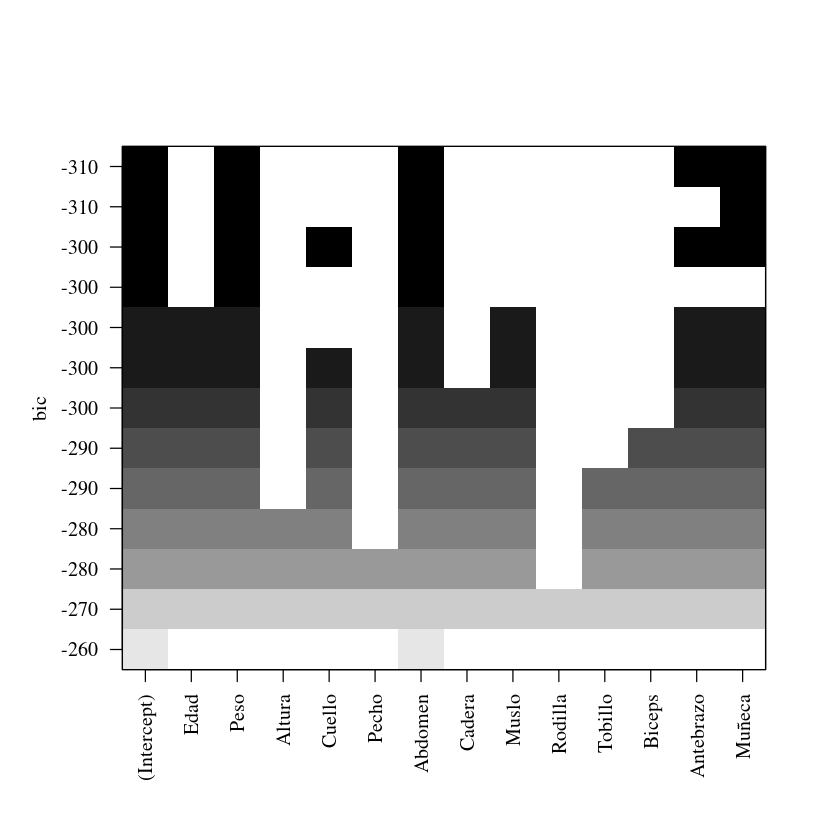

In [33]:
plot(Grasa.bss, scale = "bic") # el mejor modelo es el tiene el menor valor

In [36]:
###############################################
# Forward Stepwise Selection
###############################################

Grasa.fwd <- regsubsets(Grasa ~ ., data = Grasa.data, nvmax = 13, method = "forward")
summary(Grasa.fwd)

Subset selection object
Call: regsubsets.formula(Grasa ~ ., data = Grasa.data, nvmax = 13, 
    method = "forward")
13 Variables  (and intercept)
          Forced in Forced out
Edad          FALSE      FALSE
Peso          FALSE      FALSE
Altura        FALSE      FALSE
Cuello        FALSE      FALSE
Pecho         FALSE      FALSE
Abdomen       FALSE      FALSE
Cadera        FALSE      FALSE
Muslo         FALSE      FALSE
Rodilla       FALSE      FALSE
Tobillo       FALSE      FALSE
Biceps        FALSE      FALSE
Antebrazo     FALSE      FALSE
Muñeca        FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: forward
          Edad Peso Altura Cuello Pecho Abdomen Cadera Muslo Rodilla Tobillo
1  ( 1 )  " "  " "  " "    " "    " "   "*"     " "    " "   " "     " "    
2  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " "    
3  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " "    
4  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "

In [37]:
which.max(summary(Grasa.fwd)$adjr2)

[1] 9

In [38]:
which.min(summary(Grasa.fwd)$cp)

[1] 7

In [39]:
which.min(summary(Grasa.fwd)$bic)

[1] 4

In [40]:
###############################################
# Backward Stepwise Selection
###############################################

Grasa.bwd <- regsubsets(Grasa ~ ., data = Grasa.data, nvmax = 13, method = "backward")
summary(Grasa.bwd)

Subset selection object
Call: regsubsets.formula(Grasa ~ ., data = Grasa.data, nvmax = 13, 
    method = "backward")
13 Variables  (and intercept)
          Forced in Forced out
Edad          FALSE      FALSE
Peso          FALSE      FALSE
Altura        FALSE      FALSE
Cuello        FALSE      FALSE
Pecho         FALSE      FALSE
Abdomen       FALSE      FALSE
Cadera        FALSE      FALSE
Muslo         FALSE      FALSE
Rodilla       FALSE      FALSE
Tobillo       FALSE      FALSE
Biceps        FALSE      FALSE
Antebrazo     FALSE      FALSE
Muñeca        FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: backward
          Edad Peso Altura Cuello Pecho Abdomen Cadera Muslo Rodilla Tobillo
1  ( 1 )  " "  " "  " "    " "    " "   "*"     " "    " "   " "     " "    
2  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " "    
3  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " "    
4  ( 1 )  " "  "*"  " "    " "    " "   "*"     "

In [41]:
which.max(summary(Grasa.bwd)$adjr2)

[1] 9

In [42]:
which.min(summary(Grasa.bwd)$cp)

[1] 7

In [43]:
which.min(summary(Grasa.bwd)$bic)

[1] 4

In [46]:
## Ver los coeficientes para la variable predictoria 9
coef(Grasa.bss, 9)
coef(Grasa.fwd, 9)
coef(Grasa.bwd, 9)

(Intercept)         Edad         Peso       Cuello      Abdomen       Cadera 
-23.30499184   0.06348330  -0.09842527  -0.49329528   0.94926069  -0.18287103 
       Muslo       Biceps    Antebrazo       Muñeca 
  0.26537882   0.17888997   0.45149625  -1.54208372

(Intercept)         Edad         Peso       Cuello      Abdomen       Cadera 
-23.30499184   0.06348330  -0.09842527  -0.49329528   0.94926069  -0.18287103 
       Muslo       Biceps    Antebrazo       Muñeca 
  0.26537882   0.17888997   0.45149625  -1.54208372

(Intercept)         Edad         Peso       Cuello      Abdomen       Cadera 
-23.30499184   0.06348330  -0.09842527  -0.49329528   0.94926069  -0.18287103 
       Muslo       Biceps    Antebrazo       Muñeca 
  0.26537882   0.17888997   0.45149625  -1.54208372

In [52]:
## Ver los coeficientes para la variable predictoria 7
coef(Grasa.bss, 7)
coef(Grasa.fwd, 7)
coef(Grasa.bwd, 7)

(Intercept)        Edad        Peso      Cuello     Abdomen       Muslo 
-33.2579912   0.0681658  -0.1194405  -0.4038021   0.9178850   0.2219598 
  Antebrazo      Muñeca 
  0.5531394  -1.5324011

(Intercept)        Edad        Peso      Cuello     Abdomen       Muslo 
-33.2579912   0.0681658  -0.1194405  -0.4038021   0.9178850   0.2219598 
  Antebrazo      Muñeca 
  0.5531394  -1.5324011

(Intercept)        Edad        Peso      Cuello     Abdomen       Muslo 
-33.2579912   0.0681658  -0.1194405  -0.4038021   0.9178850   0.2219598 
  Antebrazo      Muñeca 
  0.5531394  -1.5324011

In [51]:
## Ver los coeficientes para la variable predictoria 4
coef(Grasa.bss, 4)
coef(Grasa.fwd, 4)
coef(Grasa.bwd, 4)

(Intercept)        Peso     Abdomen   Antebrazo      Muñeca 
-34.8540743  -0.1356315   0.9957513   0.4729284  -1.5055620

(Intercept)        Peso     Abdomen   Antebrazo      Muñeca 
-34.8540743  -0.1356315   0.9957513   0.4729284  -1.5055620

(Intercept)        Peso     Abdomen   Antebrazo      Muñeca 
-34.8540743  -0.1356315   0.9957513   0.4729284  -1.5055620

In [ ]:
#
#   Best Subset Selection:   
#              R cuadrado adjustado : M9  
#              Cp                   : M7
#              BIC                  : M4
#
#   Forward Stepwise Selection:
#              R cuadrado adjustado : M9  
#              Cp                   : M7
#              BIC                  : M4
#
#   Bacward Stepwise Selection:
#              R cuadrado adjustado : M9  
#              Cp                   : M7
#              BIC                  : M4
#

In [53]:
#########################################
#       Validación Cruzada 10  (k)
########################################

M9 <- glm(Grasa ~ Edad + Peso + Cuello + Abdomen + Cadera + Biceps + Antebrazo + Muñeca + Muslo, data = Grasa.data)
M7 <- glm(Grasa ~ Edad + Peso + Cuello + Abdomen + Muslo + Antebrazo + Muñeca, data = Grasa.data)
M4 <- glm(Grasa ~ Peso + Abdomen + Antebrazo + Muñeca, data = Grasa.data)


In [54]:
### load library
install.packages("boot")
library(boot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘boot’

The following object is masked from ‘package:car’:

    logit



In [57]:
set.seed(100)
cv.glm(Grasa.data, M9, K = 10)$delta[1]

#
# EP        = 19.21788
#   CV10-M9

[1] 19.21788

In [58]:
set.seed(200)
cv.glm(Grasa.data, M7, K = 10)$delta[1]

#
# EP        = 19.23123
#   CV10-M7

[1] 19.23123

In [59]:
set.seed(300)
cv.glm(Grasa.data, M4, K = 10)$delta[1]

#
# EP        = 19.49856
#   CV10-M4

[1] 19.49857

In [ ]:
#
# Elegimos el modelo que tiene el menor 
# valor por validación cruzada , se elige 
#         M9

# NOTA : RECORDAR QUE LA ELECCION DEPENDERA DE LO QUE SE BUSCA, 
#        LA DIFERENCIA ES MINIMA Y SE PUDO HABER ELEGIDO M4
#        PORQUE TIENE SOLO 4 VARIABLES PREDICTORIAS 